Allows multiple variables to display without using a print statement
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

This lets the notebook user a wider part of your screen.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

#

In [3]:
#Downloads and unpack US Census County Data from census.gov
import downloadUSACounties


**Download and extraction complete.
If their where no other messages, files already present.


In [4]:
#Creates Mongo database 'Census' and collection 'Mastdata' used to make Census data human-readable
#added this line to see if I could make a branch work
import loadMastdata

Index(['Item_Id', 'Item_Description', 'Unit_Indicator', 'Decimal_Indicator',
       'US_Total', 'Source1', 'Source11'],
      dtype='object')
**Database already exists and is loaded.


In [5]:
#Get path to Data directory with downloaded .csv files
import os
jupyterDir = os.path.realpath('../')
print('Proj -', jupyterDir)
csvDir = os.path.join(jupyterDir,'Data')
print(csvDir)
os.listdir(csvDir)

Proj - C:\Users\cffar\OneDrive\Documents\GitHub\2017_MSDS_7331_DataMining
C:\Users\cffar\OneDrive\Documents\GitHub\2017_MSDS_7331_DataMining\Data


['2017_QHP_Landscape_Individual_Market_Dental.csv',
 '2017_QHP_Landscape_Individual_Market_Dental_cleanFieldnames.csv',
 'Build Code to Clean input file.xlsx',
 'data_to_chart.csv',
 'Statelist with states exchanges.xlsx']

In [8]:
#Import the 2017 Healthcare Individual Market Dental data
#sourced from    https://data.healthcare.gov/dataset/2017-QHP-Landscape-Individual-Market-Dental-Excel/f6am-7dvb

import pandas as pd
infile = '2017_QHP_Landscape_Individual_Market_Dental.csv'
infilepath = csvDir + '\\'+ infile
print(infilepath)

print(pd.get_option('max_columns'))

pd.set_option('max_columns',100)
pd.set_option('expand_frame_repr', True)
pd.set_option('large_repr','info')
#define a mapping dictionary for fields as needed
#FIPS County Code - Was stripping leading zeros and coming in as a number, it is a zip code

dtype_dict = {'FIPS County Code': str,'State Code': str}
df = pd.read_csv(infilepath,header ='infer',sep=',',dtype=dtype_dict) # ,nrows=50 to limit the number of rows
df.columns = [c.replace(' ','_') for c in df.columns]
df.columns = [c.replace(',','') for c in df.columns]
df.columns = [c.replace('_-_','') for c in df.columns]
df.columns = [c.replace('+','_') for c in df.columns]

df.columns
print('state code type',type(df.State_Code))
print(list(df))
df.columns.tolist()
#print(df)
#print(df.dtypes)
#print(df.head(5))
df.describe()
df
#Note the output below shows the first few and last few columns and first few and last few rows
#How to show all columns?

C:\Users\cffar\OneDrive\Documents\GitHub\2017_MSDS_7331_DataMining\Data\2017_QHP_Landscape_Individual_Market_Dental.csv
100


C:\Users\cffar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


state code type <class 'pandas.core.series.Series'>
['State_Code', 'FIPS_County_Code', 'County_Name', 'Metal_Level', 'Issuer_Name', 'HIOS_Issuer_ID', 'Plan_ID_(Standard_Component)', 'Plan_Marketing_Name', 'Plan_Type', 'Rating_Area', 'Child_Only_Offering', 'Source', 'Customer_Service_Phone_Number_Local', 'Customer_Service_Phone_Number_Toll_Free', 'Customer_Service_Phone_Number_TTY', 'Network_URL', 'Plan_Brochure_URL', 'Summary_of_Benefits_URL', 'Drug_Formulary_URL', 'Routine_Dental_ServicesAdult_(Coverage)', 'Basic_Dental_CareAdult_(Coverage)', 'Major_Dental_CareAdult_(Coverage)', 'OrthodontiaAdult_(Coverage)', 'Dental_Check-Up_for_Children_(Coverage)', 'Basic_Dental_CareChild_(Coverage)', 'Major_Dental_CareChild_(Coverage)', 'OrthodontiaChild_(Coverage)', 'Premium_Rates', 'Premium_Child', 'Premium_Adult_Individual_Age_21', 'Premium_Adult_Individual_Age_27', 'Premium_Adult_Individual_Age_30_', 'Premium_Adult_Individual_Age_40_', 'Premium_Adult_Individual_Age_50_', 'Premium_Adult_Individ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50439 entries, 0 to 50438
Data columns (total 79 columns):
State_Code                                                 50439 non-null object
FIPS_County_Code                                           50439 non-null object
County_Name                                                50439 non-null object
Metal_Level                                                50439 non-null object
Issuer_Name                                                50439 non-null object
HIOS_Issuer_ID                                             50439 non-null int64
Plan_ID_(Standard_Component)                               50439 non-null object
Plan_Marketing_Name                                        50439 non-null object
Plan_Type                                                  50439 non-null object
Rating_Area                                                50439 non-null object
Child_Only_Offering                                        50439 non-null object
Source                                                     50439 non-null object
Customer_Service_Phone_Number_Local                        50327 non-null object
Customer_Service_Phone_Number_Toll_Free                    49797 non-null object
Customer_Service_Phone_Number_TTY                          39315 non-null object
Network_URL                                                50439 non-null object
Plan_Brochure_URL                                          44845 non-null object
Summary_of_Benefits_URL                                    27706 non-null object
Drug_Formulary_URL                                         0 non-null float64
Routine_Dental_ServicesAdult_(Coverage)                    40682 non-null object
Basic_Dental_CareAdult_(Coverage)                          40329 non-null object
Major_Dental_CareAdult_(Coverage)                          32182 non-null object
OrthodontiaAdult_(Coverage)                                1315 non-null object
Dental_Check-Up_for_Children_(Coverage)                    50439 non-null object
Basic_Dental_CareChild_(Coverage)                          50178 non-null object
Major_Dental_CareChild_(Coverage)                          50149 non-null object
OrthodontiaChild_(Coverage)                                48463 non-null object
Premium_Rates                                              0 non-null float64
Premium_Child                                              50439 non-null object
Premium_Adult_Individual_Age_21                            40682 non-null object
Premium_Adult_Individual_Age_27                            40682 non-null object
Premium_Adult_Individual_Age_30_                           40682 non-null object
Premium_Adult_Individual_Age_40_                           40682 non-null object
Premium_Adult_Individual_Age_50_                           40682 non-null object
Premium_Adult_Individual_Age_60_                           40682 non-null object
Premium_Couple_21__                                        40682 non-null object
Premium_Couple_30_                                         40682 non-null object
Premium_Couple_40_                                         40682 non-null object
Premium_Couple_50_                                         40682 non-null object
Premium_Couple_60_                                         40682 non-null object
Couple_1_child_Age_21                                      40682 non-null object
Couple_1_child_Age_30_                                     40682 non-null object
Couple_1_child_Age_40_                                     40682 non-null object
Couple_1_child_Age_50_                                     40682 non-null object
Couple_2_children_Age_21                                   40682 non-null object
Couple_2_children_Age_30_                                  40682 non-null object
Couple_2_children_Age_40_                                  40682 non-null object
Couple_2_children_Age_50                                   40682 non-null object
Couple_3_or

In [7]:
import decimal
D = decimal.Decimal

df["State_Code"]=df["State_Code"].astype(str)
df["FIPS_County_Code"]=df["FIPS_County_Code"].astype(str)
df["County_Name"]=df["County_Name"].astype(str)
df["Metal_Level"]=df["Metal_Level"].astype(str)
df["Issuer_Name"]=df["Issuer_Name"].astype(str)
df["HIOS_Issuer_ID"]=df["HIOS_Issuer_ID"].astype(str)
df["Plan_ID_(Standard_Component)"]=df["Plan_ID_(Standard_Component)"].astype(str)
df["Plan_Marketing_Name"]=df["Plan_Marketing_Name"].astype(str)
df["Plan_Type"]=df["Plan_Type"].astype(str)
df["Rating_Area"]=df["Rating_Area"].astype(str)
df["Child_Only_Offering"]=df["Child_Only_Offering"].astype(str)
df["Source"]=df["Source"].astype(str)
df["Customer_Service_Phone_Number_Local"]=df["Customer_Service_Phone_Number_Local"].astype(str)
df["Customer_Service_Phone_Number_Toll_Free"]=df["Customer_Service_Phone_Number_Toll_Free"].astype(str)
df["Customer_Service_Phone_Number_TTY"]=df["Customer_Service_Phone_Number_TTY"].astype(str)
df["Network_URL"]=df["Network_URL"].astype(str)
df["Plan_Brochure_URL"]=df["Plan_Brochure_URL"].astype(str)
df["Summary_of_Benefits_URL"]=df["Summary_of_Benefits_URL"].astype(str)
df["Drug_Formulary_URL"]=df["Drug_Formulary_URL"].astype(str)
df["Routine_Dental_ServicesAdult_(Coverage)"]=df["Routine_Dental_ServicesAdult_(Coverage)"].astype(str)
df["Basic_Dental_CareAdult_(Coverage)"]=df["Basic_Dental_CareAdult_(Coverage)"].astype(str)
df["Major_Dental_CareAdult_(Coverage)"]=df["Major_Dental_CareAdult_(Coverage)"].astype(str)
df["OrthodontiaAdult_(Coverage)"]=df["OrthodontiaAdult_(Coverage)"].astype(str)
df["Dental_Check-Up_for_Children_(Coverage)"]=df["Dental_Check-Up_for_Children_(Coverage)"].astype(str)
df["Basic_Dental_CareChild_(Coverage)"]=df["Basic_Dental_CareChild_(Coverage)"].astype(str)
df["Major_Dental_CareChild_(Coverage)"]=df["Major_Dental_CareChild_(Coverage)"].astype(str)
df["OrthodontiaChild_(Coverage)"]=df["OrthodontiaChild_(Coverage)"].astype(str)
df["Premium_Rates"]=df["Premium_Rates"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Child"]=df["Premium_Child"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_21"]=df["Premium_Adult_Individual_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_27"]=df["Premium_Adult_Individual_Age_27"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_30_"]=df["Premium_Adult_Individual_Age_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_40_"]=df["Premium_Adult_Individual_Age_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_50_"]=df["Premium_Adult_Individual_Age_50_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_60_"]=df["Premium_Adult_Individual_Age_60_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_21__"]=df["Premium_Couple_21__"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_30_"]=df["Premium_Couple_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_40_"]=df["Premium_Couple_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_50_"]=df["Premium_Couple_50_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_60_"]=df["Premium_Couple_60_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_21"]=df["Couple_1_child_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_30_"]=df["Couple_1_child_Age_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_40_"]=df["Couple_1_child_Age_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_50_"]=df["Couple_1_child_Age_50_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_21"]=df["Couple_2_children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_30_"]=df["Couple_2_children_Age_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_40_"]=df["Couple_2_children_Age_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_50"]=df["Couple_2_children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_21"]=df["Couple_3_or_more_Children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_30"]=df["Couple_3_or_more_Children_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_40"]=df["Couple_3_or_more_Children_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_50"]=df["Couple_3_or_more_Children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_21"]=df["Individual_1_child_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_30"]=df["Individual_1_child_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_40"]=df["Individual_1_child_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_50"]=df["Individual_1_child_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_21"]=df["Individual_2_children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_30"]=df["Individual_2_children_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_40"]=df["Individual_2_children_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_50"]=df["Individual_2_children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_21"]=df["Individual_3_or_more_children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_30"]=df["Individual_3_or_more_children_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_40"]=df["Individual_3_or_more_children_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_50"]=df["Individual_3_or_more_children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Standard_On_Exchange"]=df["Standard_On_Exchange"].astype(str)
df["Dental_DeductibleIndividualStandard"]=df["Dental_DeductibleIndividualStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_DeductibleFamilyStandard"]=df["Dental_DeductibleFamilyStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_DeductibleFamily_(Per_Person)Standard"]=df["Dental_DeductibleFamily_(Per_Person)Standard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_Maximum_Out_of_PocketIndividualStandard"]=df["Dental_Maximum_Out_of_PocketIndividualStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_Maximum_Out_of_PocketFamilyStandard"]=df["Dental_Maximum_Out_of_PocketFamilyStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_Maximum_Out_of_PocketFamily_(Per_Person)Standard"]=df["Dental_Maximum_Out_of_PocketFamily_(Per_Person)Standard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Routine_Dental_ServicesAdult"]=df["Routine_Dental_ServicesAdult"].astype(str)
df["Basic_Dental_CareAdult"]=df["Basic_Dental_CareAdult"].astype(str)
df["Major_Dental_CareAdult"]=df["Major_Dental_CareAdult"].astype(str)
df["OrthodontiaAdult"]=df["OrthodontiaAdult"].astype(str)
df["Dental_Check-Up_for_Children"]=df["Dental_Check-Up_for_Children"].astype(str)
df["Basic_Dental_CareChild"]=df["Basic_Dental_CareChild"].astype(str)
df["Major_Dental_CareChild"]=df["Major_Dental_CareChild"].astype(str)
df["OrthodontiaChild"]=df["OrthodontiaChild"].astype(str)




In [9]:
df.dtypes

State_Code                                                  object
FIPS_County_Code                                            object
County_Name                                                 object
Metal_Level                                                 object
Issuer_Name                                                 object
HIOS_Issuer_ID                                               int64
Plan_ID_(Standard_Component)                                object
Plan_Marketing_Name                                         object
Plan_Type                                                   object
Rating_Area                                                 object
Child_Only_Offering                                         object
Source                                                      object
Customer_Service_Phone_Number_Local                         object
Customer_Service_Phone_Number_Toll_Free                     object
Customer_Service_Phone_Number_TTY                           ob

In [10]:
# jupyter nbextension install --sys-prefix --py  vega
# jupyter nbextension vega --py --sys-prefix 
# conda install vega --channel conda-forge
# pip install git+https://github.com/altair-viz/altair

#import pathlib
#data_to_chart = csvDir + '\\'+ 'data_to_chart.csv'
#df.to_csv(data_to_chart)
#print(data_to_chart)

In [11]:
#Start over with Seaborn for charts

In [12]:
#example from http://seaborn.pydata.org/tutorial/distributions.html
%matplotlib inline
import sys
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(style='whitegrid', color_codes=True)

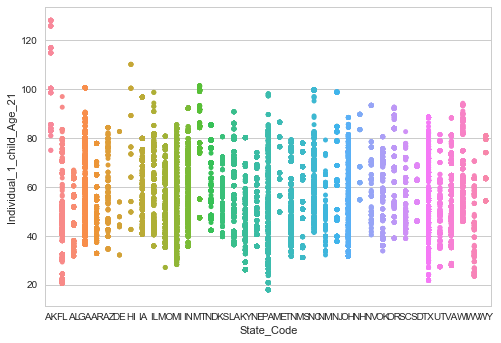

In [13]:
sns.stripplot(data = df, x='State_Code', y='Individual_1_child_Age_21')

In [13]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
#print('Matplotlib version ' + plt.__version__)
print('Seaborn version ' + sns.__version__)
print('numpy version ' + np.__version__)
#print('scipy version ' + stats.__version__)


Python version 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.19.2
Seaborn version 0.7.1
numpy version 1.11.3


In [ ]:
#Skip below here

In [ ]:
#This worked but after it ran once I was getting memory errors with Chrome crashing.  Seems like it is a known bug but no solution yet.
# jupyter nbextension install --sys-prefix --py  vega
# jupyter nbextension vega --py --sys-prefix 
# conda install vega --channel conda-forge
# pip install git+https://github.com/altair-viz/altair

#from altair import Chart
#data_to_plot = df.sort_values(by='Individual_1_child_Age_21', ascending=True)

#chart = Chart(data_to_plot).mark_circle().encode(
#    x='State_Code',
#    y='Individual_1_child_Age_21',
#    color = 'Metal_Level'
#)
#chart.display()

In [ ]:
#supposed to sort but not working for me

#from altair import Chart
#chart = Chart(df).mark_circle().encode(
#    x=X('State_Code', axis = Axis(title = 'State Abbrv'), sort=sortField(field='Individual_1_child_Age_21', order = 'ascending', op='mean')),
#    y='Individual_1_child_Age_21',
#)
#chart

In [ ]:
# Got stuck on mapping, gave up for now

In [14]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.19.2
Matplotlib version 2.0.0


In [15]:
#import statenames
import us
us.states.mapping('abbr','name')
#How can we list all states and show the ones in our dataset

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'DK': 'Dakota',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OL': 'Orleans',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PI': 'Philippine Islands',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 

In [16]:
#List of states in the dataset
statelist = list(set(df.State_Code))
print('Count of states =', len(statelist))
print(statelist)

Count of states = 39
['IA', 'MO', 'OR', 'SD', 'NM', 'NV', 'WY', 'AK', 'PA', 'AR', 'AZ', 'NE', 'NC', 'GA', 'HI', 'SC', 'TX', 'MI', 'DE', 'TN', 'OK', 'WV', 'LA', 'MT', 'IN', 'OH', 'WI', 'ND', 'AL', 'VA', 'FL', 'IL', 'KY', 'ME', 'MS', 'NH', 'NJ', 'UT', 'KS']


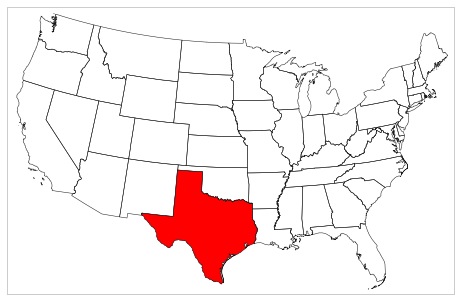

In [17]:
#conda install -c conda-forge basemap=1.0.8.dev0
#conda install -c conda-forge basemap-data-hires      Need this for high resolution maps like county maps

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
# collect the state names from the shapefile attributes so we can

# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon   -  I can get it to work for one state, how do I convert state abbreviations to statenames and pass in a list of states?
seg = map.states[state_names.index('Texas')]
#seg = map.states[statelist]

poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()

In [19]:
#westlimit=-125.3; southlimit=24.6; eastlimit=-65.6; northlimit=49.7

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map_background(m, ax):
# ax.set_axis_bgcolor('#729FCF')
    ax.set_facecolor('#729FCF')
    m.fillcontinents(color='#FAFAFA', ax=ax, zorder=0)
    m.drawcounties(ax=ax)
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)
KM = 1000.
# 750 zooms in but doesn't make the map larger not sure how to do that
#KM = 750.  
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM
m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
            resolution='i', area_thresh=2500., projection='lcc',
            lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)
fig = plt.figure()
ax = fig.add_subplot(111)
draw_map_background(m, ax)
plt.show()

OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install -c conda-forge basemap-data-hires`.

In [20]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#import matplotlib.cm
#from matplotlib.patches import Polygon
#from matplotlib.collections import PatchCollection
#from matplotlib.colors import Normalize

plt.figure(figsize=(24,12))
#= plt.subplots(figsize=(20,10))
def draw_map_background(m, ax):
    m = Basemap(resolution='i',projection='lcc',
        llcrnrlon=-119,llcrnrlat=22,
        urcrnrlon=-64,urcrnrlat=49,
        lat_1=32,lat_2=45,lon_0=-95)
#    m.drawmapboundary(fill_color='#46bcec')
#    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.readshapefile('st99_d00', name='states', drawbounds=True)
#    m.drawcoastlines()
    m.drawcounties()
#    m.drawstates()
    ax = fig.add_subplot(111)


draw_map_background(m, ax)
plt.title('US map showing states with federal ACA exchanges')

plt.show()

NameError: name 'm' is not defined

In [21]:
print(plt.title)

<function title at 0x000001A71F3DB378>


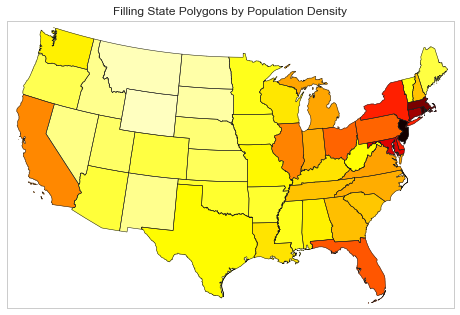

In [22]:
#example here https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':    271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':  107.05,
'Pennsylvania':  105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':   23.42,
'Iowa':  20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':  10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':  3.84,
'North Dakota':  3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()

## Business Understanding (10 points)
#Describe the purpose of the data set you selected (i.e., why was this data collected in the ﬁrst place?). 
#Describe how you would deﬁne and measure the outcomes from the dataset. 
#That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 
#How would you measure the effectiveness of a good prediction algorithm? Be speciﬁc. 

| Variable | Type | Definition |
|:--------:|:----:|:----------:|
| x | int | x coord |
| y | int | y coord |


## Data Understanding (80 points)

#### 10 points - Describe data, outcome metrics,
#1)Describe the purpose of the data set, why was the data collected.  Define outcome measures, what is important, 
#how do you know if you achieved the objective.  How to measure the effectiveness of a good prediction algorythm.

In [ ]:
#### 15 points - Data Quality, Explain data cleansing steps, give justifications

In [ ]:
#### 10 points - Visualize appropriate statistics on a subset of the data, explain why the statistics are meaningful

In [ ]:
#### 15 points - Visualize 5 or more interesting attributes, interpret implications for each visualization, explain for each attribute, why the visualization is appropriate.

In [ ]:
#### 15 points - Visualize relationships between attributes, ie scatter plots, correlation, cross=tabulation, groupwise avgs, etc.  Explain interesting relationships

In [ ]:
#### 10 points - Identify and explain interesting relationships between features and the class you are trying to predict

In [ ]:
#### 5 points - Are there other features that could be added to the data or created from existing features, explain.

## Exceptional Work (10 points)

In [ ]:
#### Free reign on additional analysis (since there are four of us we better do this!)
#### Dimensional reduction, image processing, etc.